### Building a Sequential model

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

*Build a convolutional neural network model*

In [2]:
model = Sequential([
                    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                    MaxPooling2D((3, 3)),
                    Flatten(),
                    Dense(10, activation='softmax')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=[acc, mae])

### The fit method

In [5]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
labels = [
          'T-shirt/top',
          'Trouser',
          'Pullover',
          'Dress',
          'Coat',
          'Sandal',
          'Shirt',
          'Sneaker',
          'Bag',
          'Ankle boot'
]

print(train_labels[0])

9


In [9]:
# Rescale the image values so that the lie in between 0 and 1

train_images = train_images / 255.
test_images = test_images / 255.

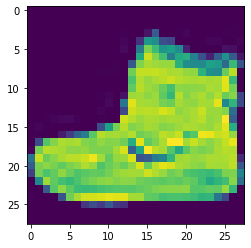

label: Ankle boot


In [10]:
# Display one of the images

i = 0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

In [18]:
# Fit the model

history = model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Epoch 1/8
235/235 - 12s - loss: 0.3317 - sparse_categorical_accuracy: 0.8821 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 12s - loss: 0.3170 - sparse_categorical_accuracy: 0.8881 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 12s - loss: 0.3061 - sparse_categorical_accuracy: 0.8916 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 12s - loss: 0.2971 - sparse_categorical_accuracy: 0.8935 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 12s - loss: 0.2904 - sparse_categorical_accuracy: 0.8965 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 12s - loss: 0.2825 - sparse_categorical_accuracy: 0.8982 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 - 12s - loss: 0.2810 - sparse_categorical_accuracy: 0.8992 - mean_absolute_error: 4.4200
Epoch 8/8
235/235 - 12s - loss: 0.2767 - sparse_categorical_accuracy: 0.9003 - mean_absolute_error: 4.4200


### Plot training history

In [19]:
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.331687,0.882133,4.420001
1,0.317039,0.888117,4.420001
2,0.306061,0.891567,4.420000
3,0.297075,0.893450,4.420002
4,0.290435,0.896483,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

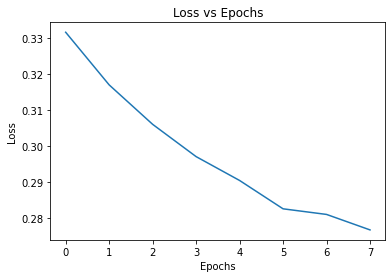

In [20]:
loss_plot = df.plot(y="loss", title = "Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")